In [102]:
# Let us generate 1,000 random numbers for:

# normal, 
# t with 3 degrees of freedom, 
# lognormal distributions, end
# your own (e.g. double exponential), 

# In all cases, we apply a chi-square test with 32 bins (K) to test for normally distributed data. 
# The normal distribution has two parameters ddof=2 (degrees of freedom = K - 2 - 1)

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy

#n
N = 1000

# bins
BINS = 30

mu = 1.0
sigma = 1.0

# Y1 = np.random.normal(loc=mu, scale = sigma, size=N)
Y1 = np.random.lognormal(mean=mu, sigma = sigma, size=N)
h1 = np.histogram(Y1, bins = BINS)

In [103]:
h1[1]

array([1.31958582e-01, 4.70082776e+00, 9.26969694e+00, 1.38385661e+01,
       1.84074353e+01, 2.29763045e+01, 2.75451737e+01, 3.21140428e+01,
       3.66829120e+01, 4.12517812e+01, 4.58206504e+01, 5.03895196e+01,
       5.49583887e+01, 5.95272579e+01, 6.40961271e+01, 6.86649963e+01,
       7.32338654e+01, 7.78027346e+01, 8.23716038e+01, 8.69404730e+01,
       9.15093422e+01, 9.60782113e+01, 1.00647081e+02, 1.05215950e+02,
       1.09784819e+02, 1.14353688e+02, 1.18922557e+02, 1.23491426e+02,
       1.28060296e+02, 1.32629165e+02, 1.37198034e+02])

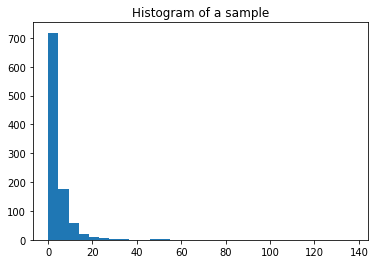

In [104]:
plt.hist(Y1, bins=BINS)  # arguments are passed to np.histogram
plt.title("Histogram of a sample")
plt.show()

10 1.0


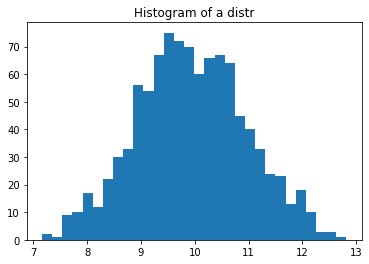

In [105]:
# some guess for parameters
# mu0 = np.mean(Y1)
# sigma0 = np.std(Y1, ddof = 1)

# some distr
dist = norm(mu0, sigma0)

mu0 = 10
sigma0 = 1.0


print(mu0, sigma0)
X1 = np.random.normal(loc=mu0, scale = sigma0, size=N)
h2 = np.histogram(X1, bins = BINS)
plt.hist(X1, bins=BINS)  # arguments are passed to np.histogram
plt.title("Histogram of a distr")
plt.show()



In [106]:
#Chi-square


_, edges = np.histogram(X1, bins=BINS)
expected = np.array([dist.cdf(edges[i + 1]) - dist.cdf(edges[i]) * N
                    for i in range(BINS)])

h0 = np.histogram(X1, bins = BINS)
expected = h0[0]/N
print(expected)
observed = h1[0]/N
print(observed)



[0.002 0.001 0.009 0.01  0.017 0.012 0.022 0.03  0.033 0.056 0.054 0.067
 0.075 0.072 0.07  0.06  0.066 0.067 0.064 0.045 0.04  0.033 0.024 0.023
 0.013 0.018 0.01  0.003 0.003 0.001]
[0.718 0.176 0.058 0.021 0.009 0.006 0.003 0.002 0.    0.001 0.002 0.002
 0.001 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.001]


In [107]:
print(scipy.stats.chisquare(f_obs=observed, f_exp=expected, ddof=2))

Power_divergenceResult(statistic=288.1653498739452, pvalue=1.6379751736505053e-45)
